TASK 1

In [5]:
klientData1 <- read.table('https://courses.cs.ut.ee/MTAT.03.183/2015_spring/uploads/Main/klient1.txt',header = TRUE)
klientData2 <- read.table('https://courses.cs.ut.ee/MTAT.03.183/2015_spring/uploads/Main/klient3.txt',header=TRUE)

In [8]:
d1 <- density(klientData1[, 1], bw = 0.2)
d2 <- density(klientData2[, 1], bw = 0.2)

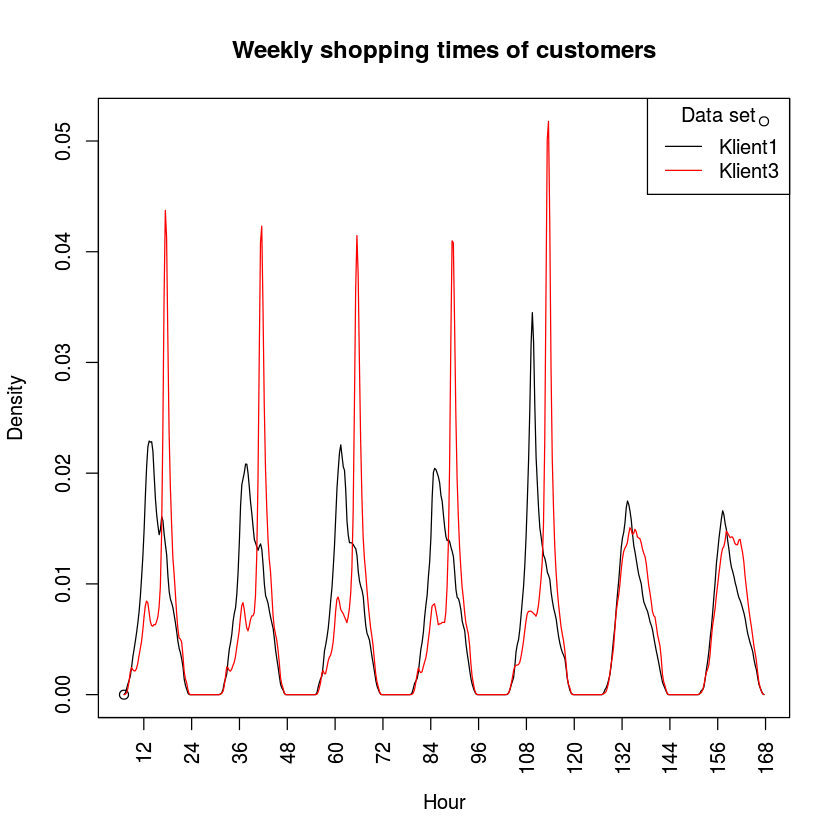

In [9]:
plot(range(d1$x, d2$x), range(d1$y, d2$y), xlab = 'Hour', ylab = 'Density',
main = 'Weekly shopping times of customers', xaxt = 'n')
legend('topright', title = 'Data set', c('Klient1', 'Klient3'), lty = 1, col = 1:2)
axis(1, at = seq(0, 168, by = 12), las = 2)
lines(d1, col = 1)
lines(d2, col = 2)

TASK 2

In [6]:
dat = read.table("https://courses.cs.ut.ee/MTAT.03.183/2016_spring/uploads/Main/product_time_shop.txt",header = TRUE,sep = ";")
dat$weekday <- weekdays(as.Date(as.character(dat$date), '%Y%m%d'))

In [7]:
dat$hour <- floor(dat$time/100)

In [8]:
head(dat)

date time product shop_id  weekday hour
1 20140104  900  Banana      18 Saturday    9
2 20140104  900  Banana      18 Saturday    9
3 20140104  924  Banana      18 Saturday    9
4 20140104  929  Banana      18 Saturday    9
5 20140104  932  Banana      18 Saturday    9
6 20140104  948  Banana      18 Saturday    9

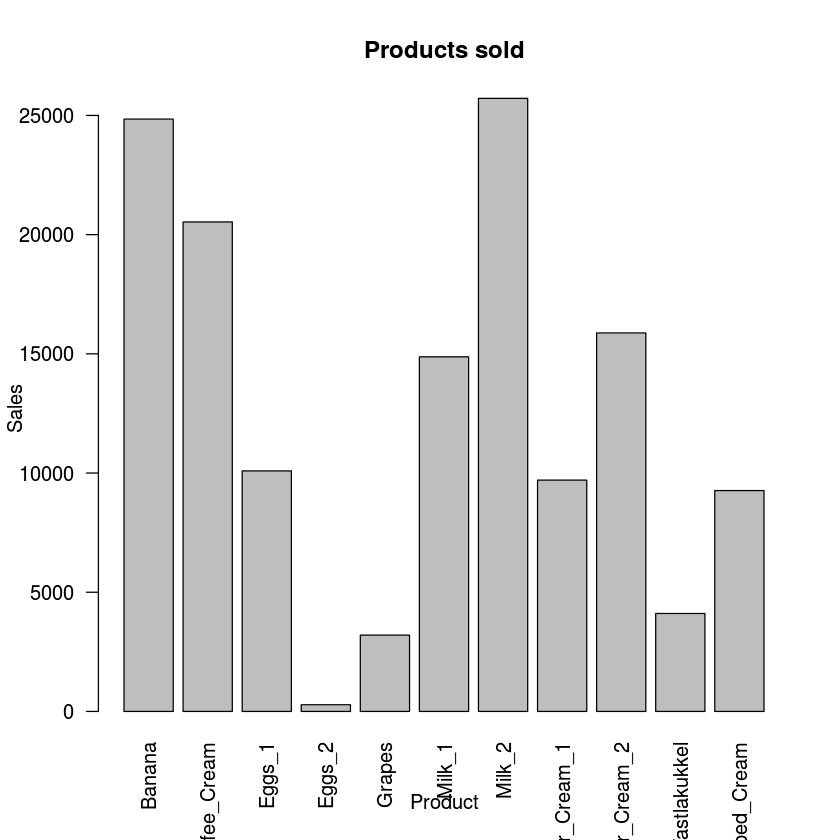

In [9]:
barplot(table(dat$product), xlab = 'Product', ylab = 'Sales', las = 2,
main = 'Products sold')

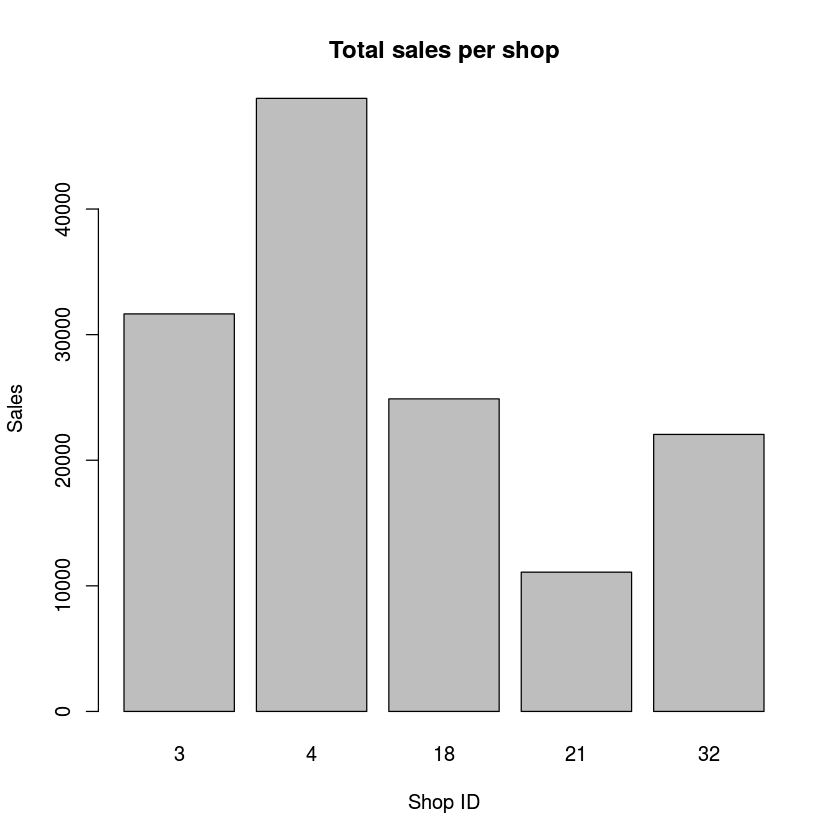

In [10]:
barplot(table(dat$shop_id), xlab= 'Shop ID', ylab = 'Sales',
main = 'Total sales per shop')

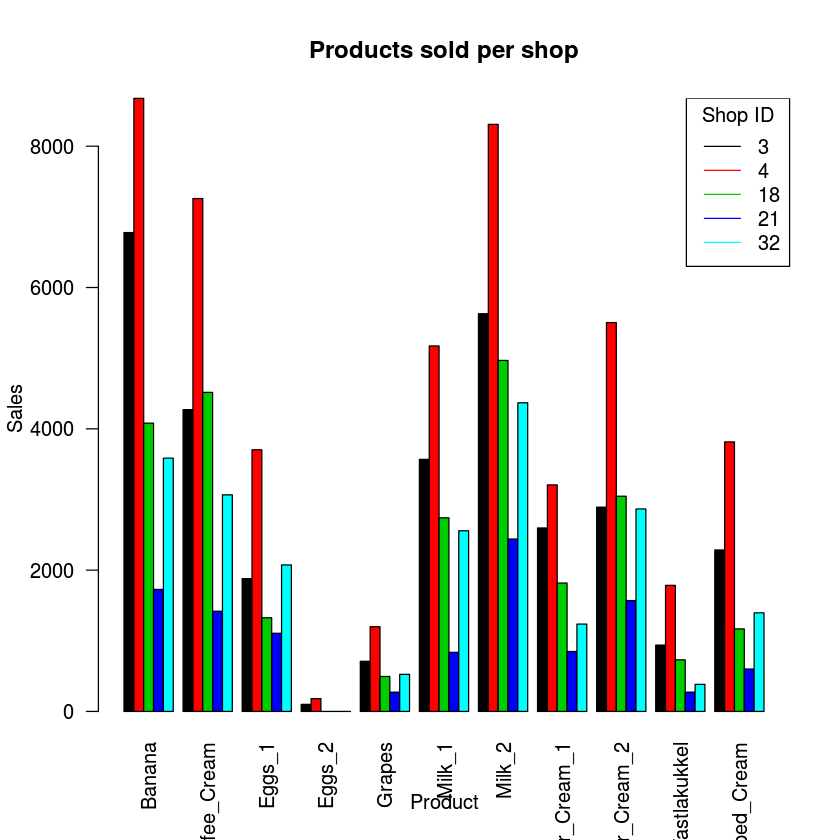

In [11]:
bpData <- table(matrix())
shopIds <- names(table(dat$shop_id))
for (shopId in shopIds) {
shopData <- table(dat[dat$shop_id == shopId, 'product'])
bpData <- rbind(bpData, shopData)
}
barplot(bpData, beside = TRUE, las = 2, xlab = 'Product', ylab = 'Sales',col=c(1:5),
main = 'Products sold per shop')
legend('topright', title = 'Shop ID', shopIds, lty = 1.5, col = c(1:5))

TASK 3

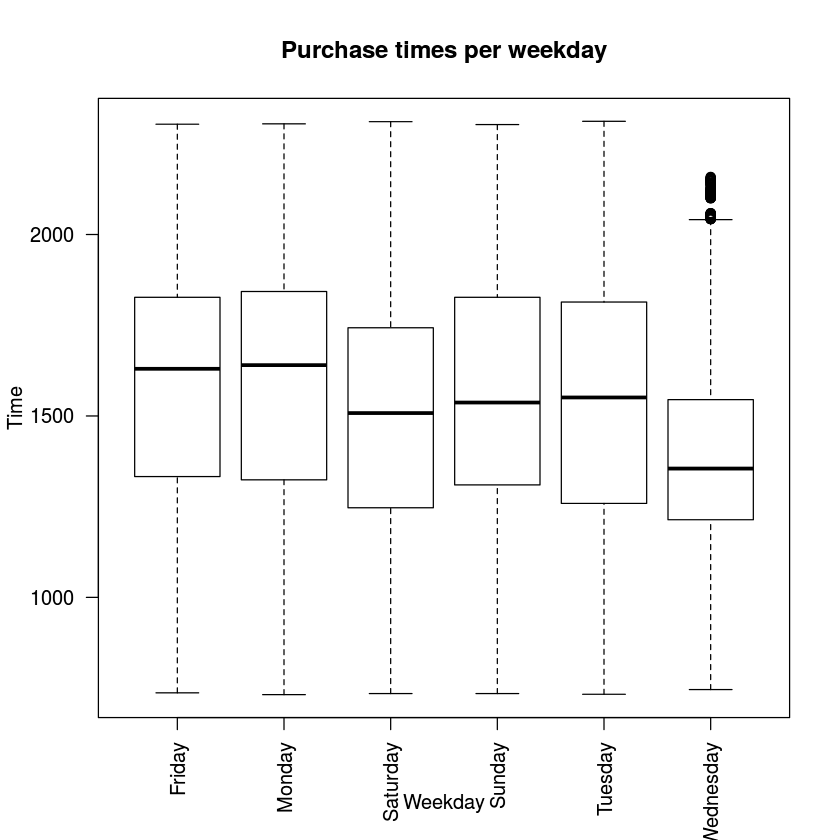

In [12]:
boxplot(time ~ weekday, dat, main = 'Purchase times per weekday',
xlab = 'Weekday', ylab = 'Time', las = 2)

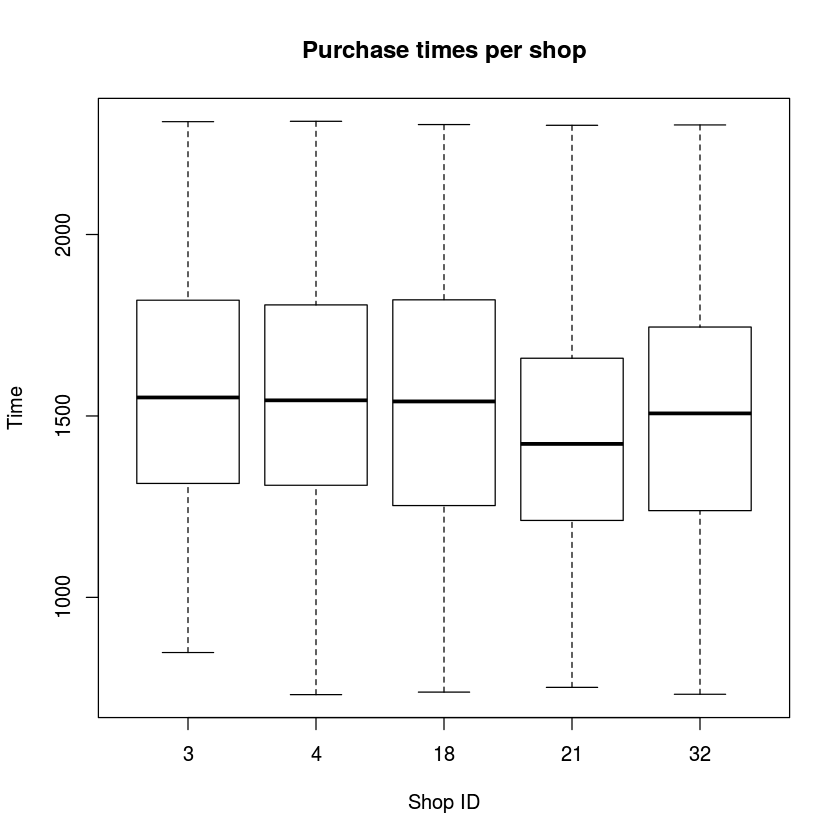

In [13]:
boxplot(time ~ shop_id, dat, main = 'Purchase times per shop',
xlab = 'Shop ID', ylab = 'Time')

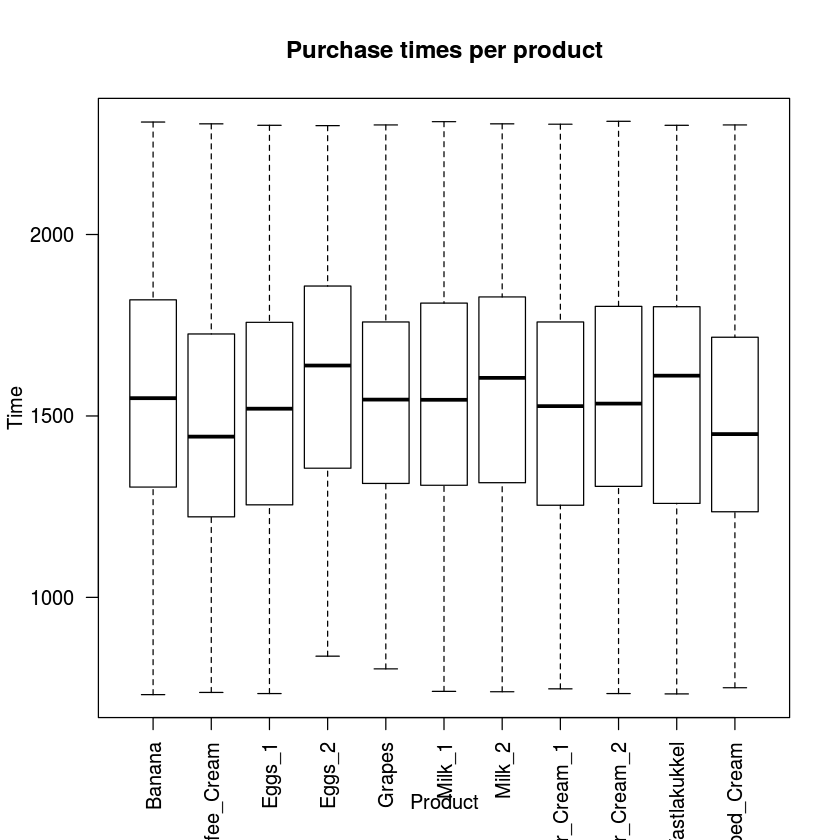

In [14]:
boxplot(time ~ product, dat, main = 'Purchase times per product',
xlab = 'Product', ylab = 'Time', las = 2)

TASK 4

In [15]:
plotSales <- function (dates, shopId, product) {
colors <- c(1,unique(dat))
plot(range(7, 23), range(0, 0.25), xlab = 'Hour', ylab = 'Density',
main = paste(product, ' sales in Shop ', shopId), xaxt = 'n')
legend('topright', title = 'Date', legend = dates, lwd = 2, col = colors, cex = 0.7)
axis(1, at = seq(7, 23, by = 1), las=2)
for (i in 1:length(dates)) {
sales <- dat[dat$product == product & dat$shop_id == shopId &
dat$date == dates[i], 'hour']
if (length(sales) > 0) {
d <- density(sales)
lines(d, col = colors[i], lwd = 2)
}
}
}
dates <- unique(dat$date)
shops <- unique(dat$shop_id)

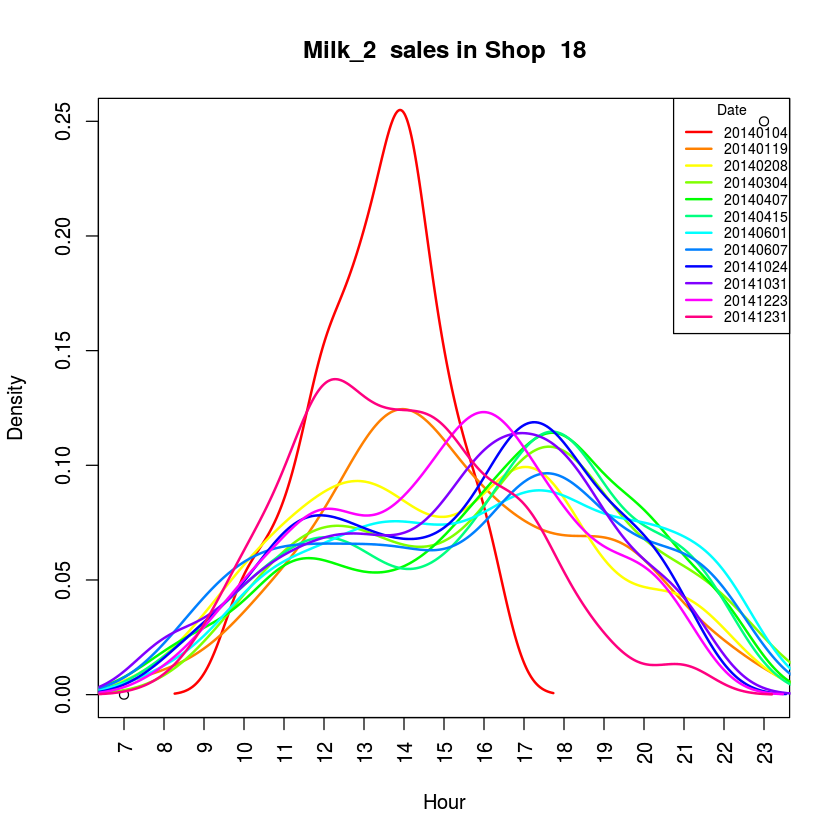

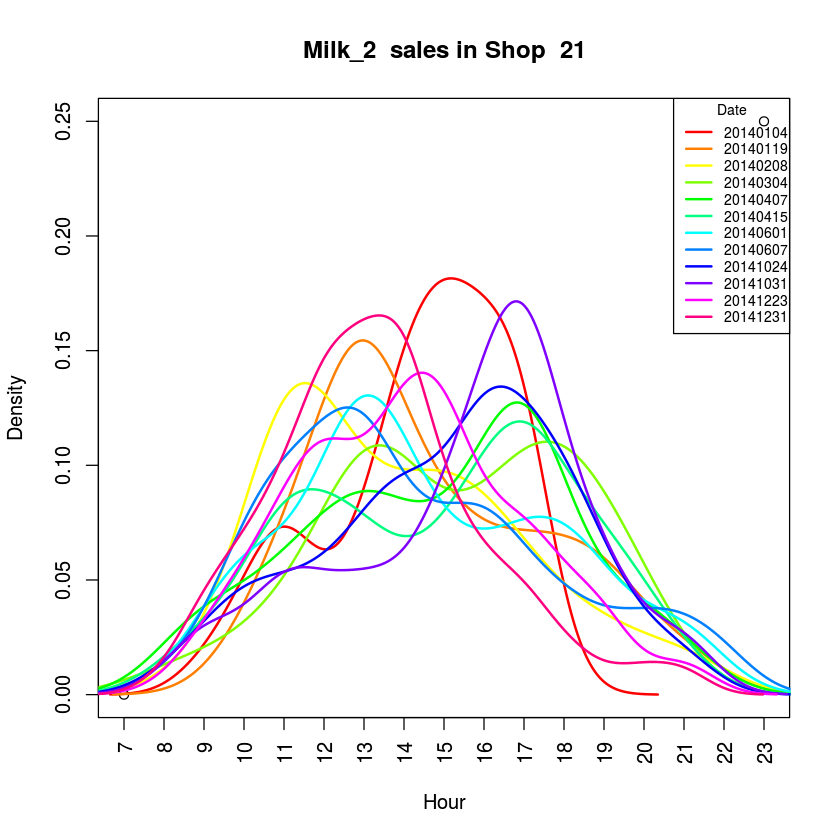

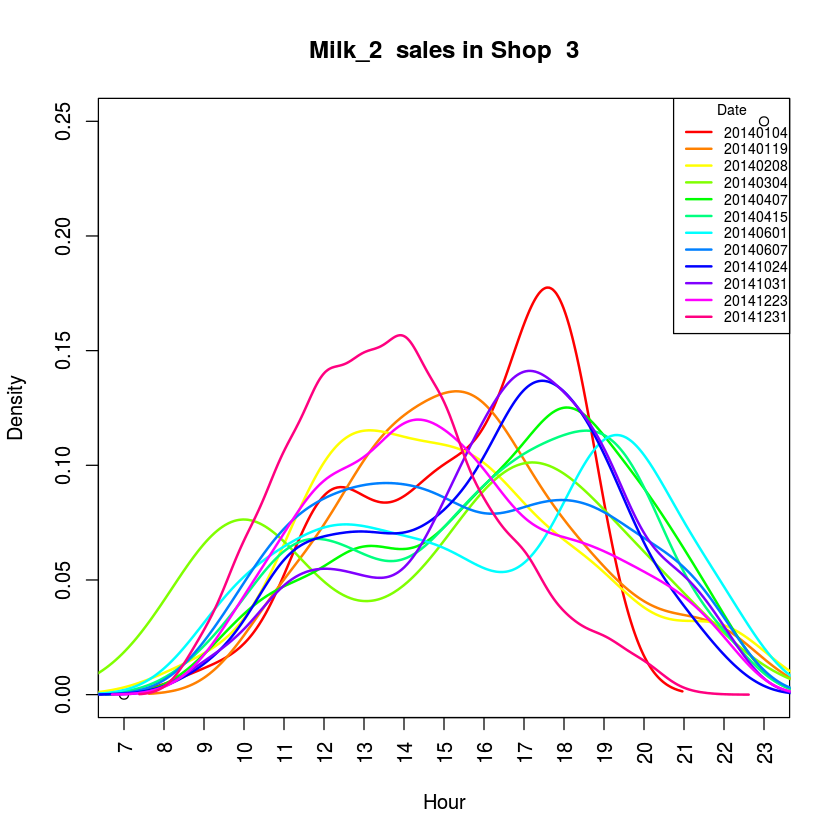

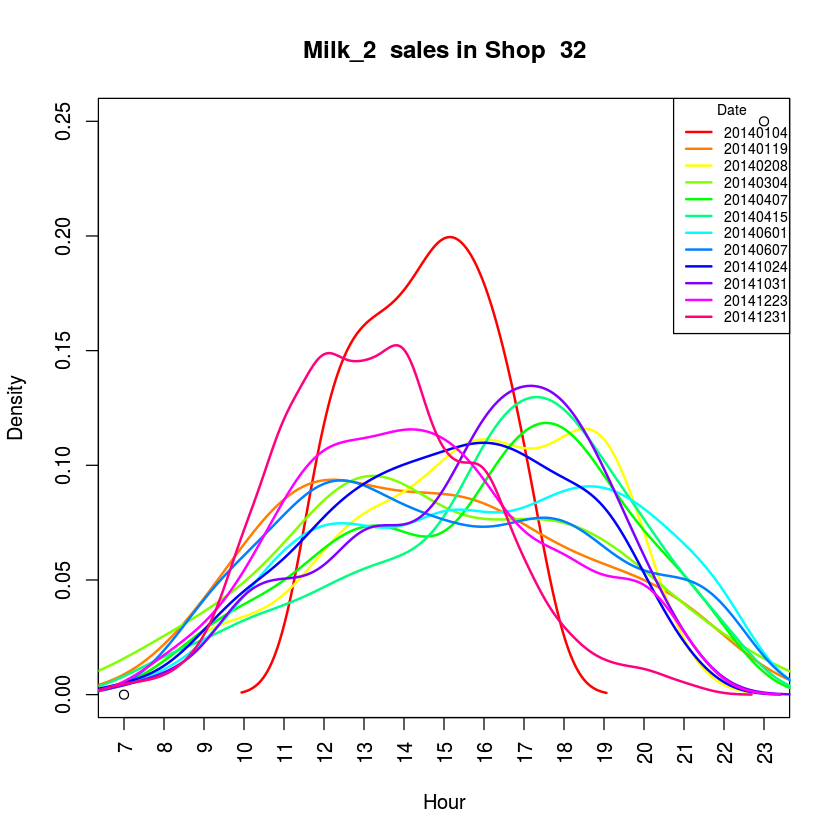

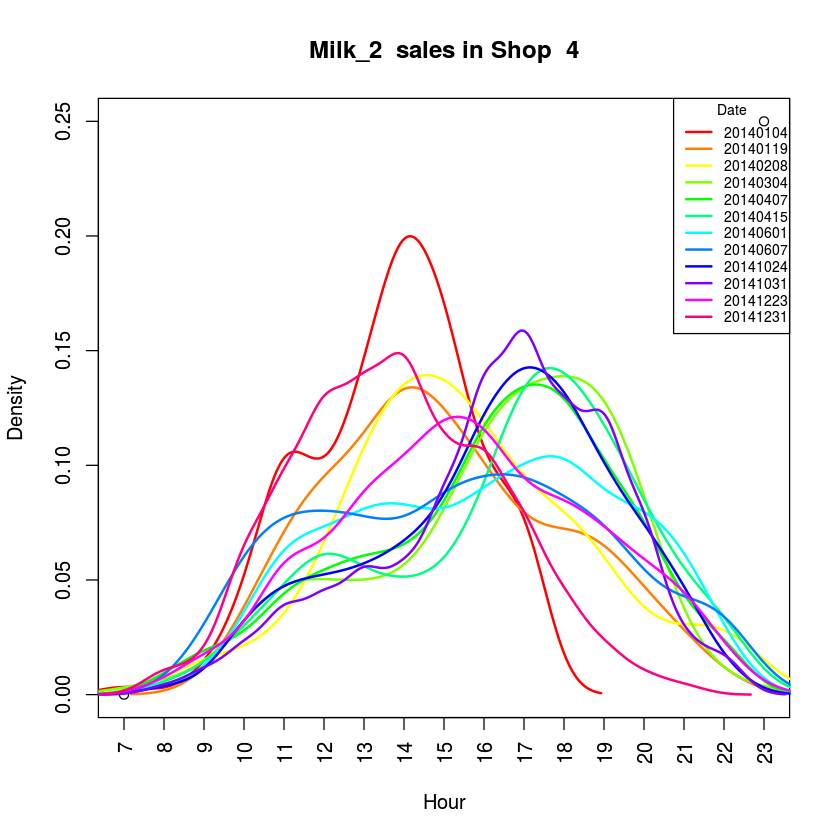

In [16]:
for (shop in shops) {
plotSales(dates, shop, 'Milk_2')
}

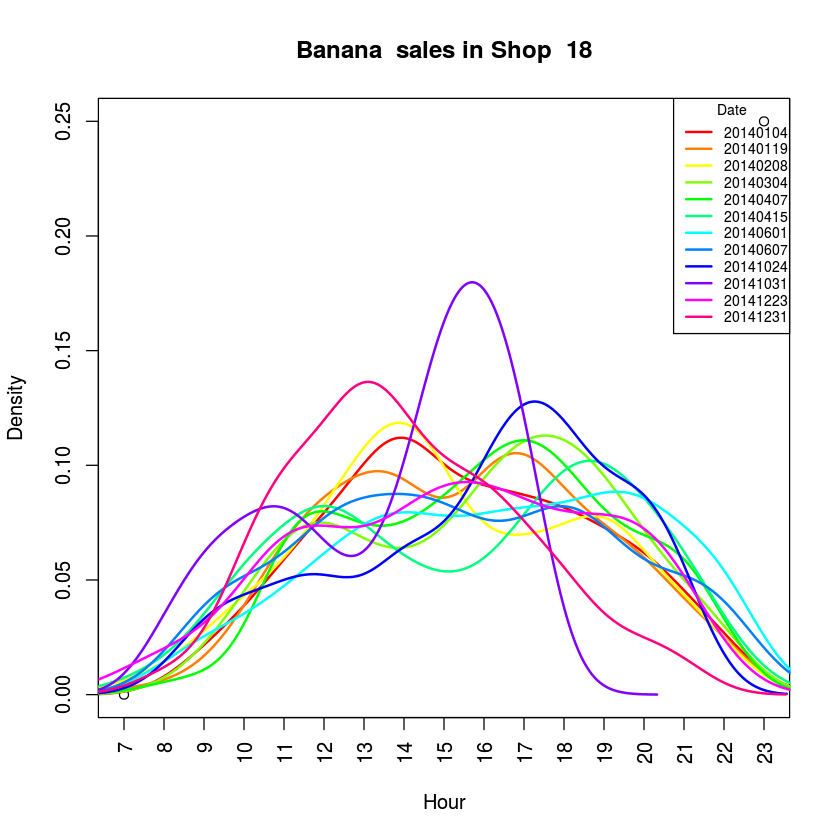

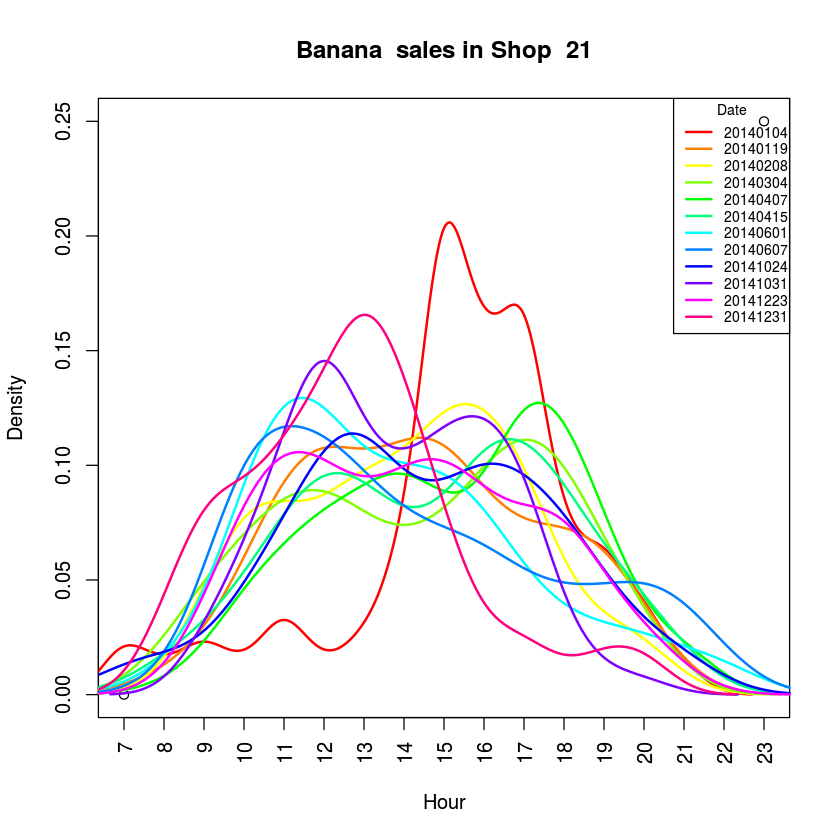

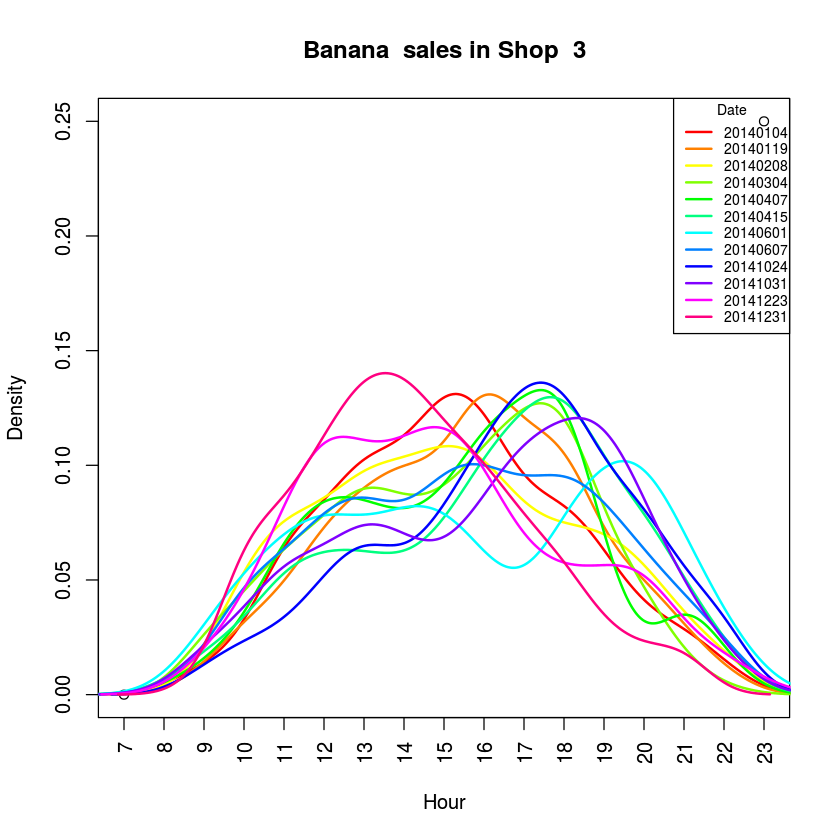

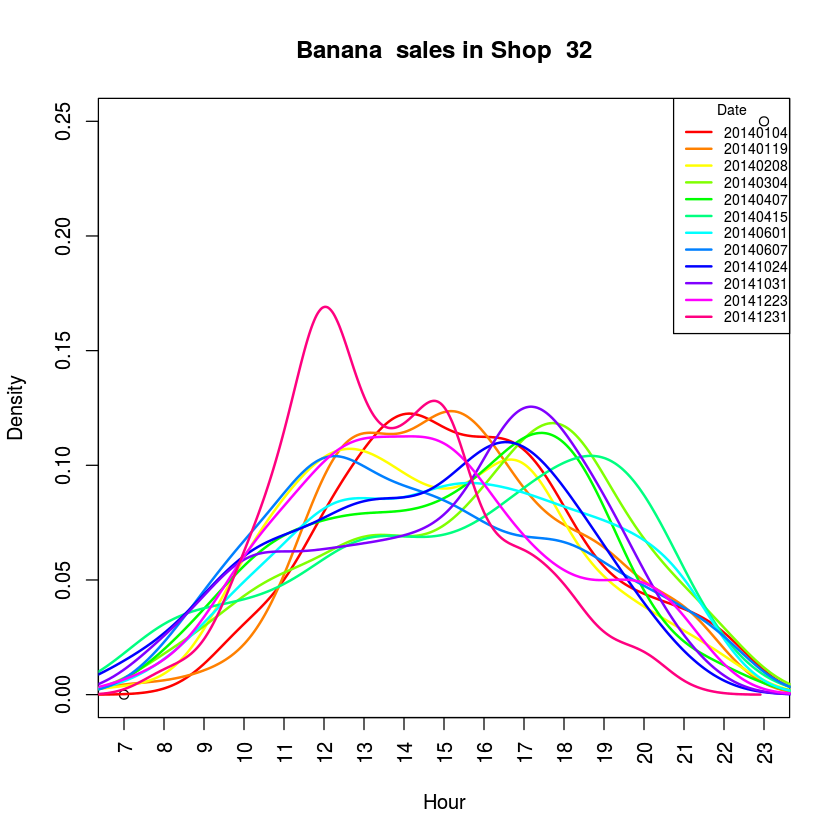

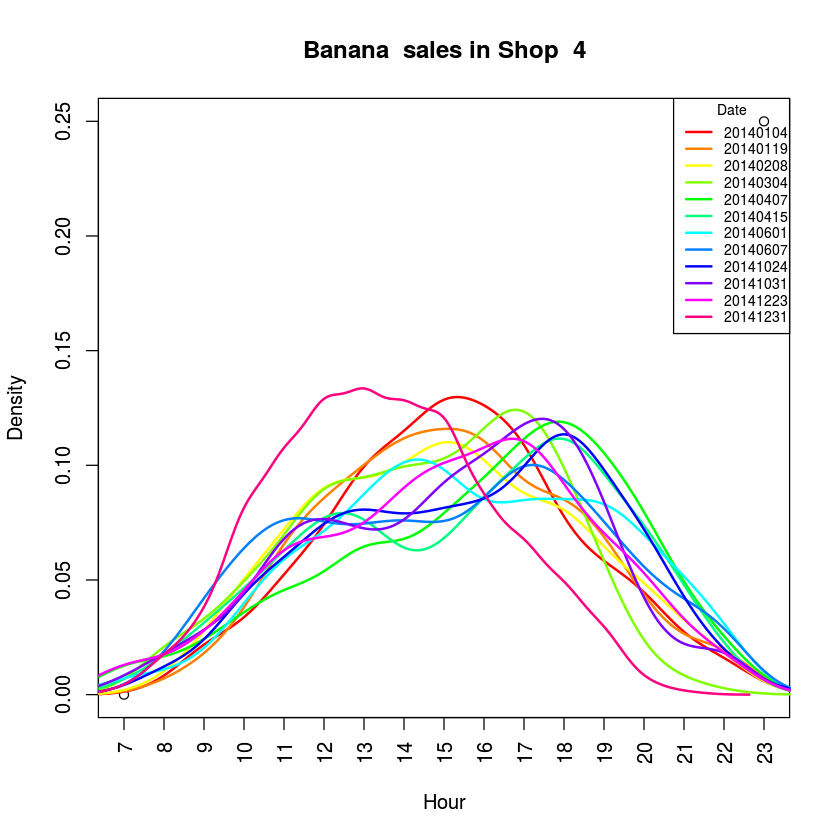

In [17]:
for (shop in shops) {
plotSales(dates, shop, 'Banana')
}

TASK 5

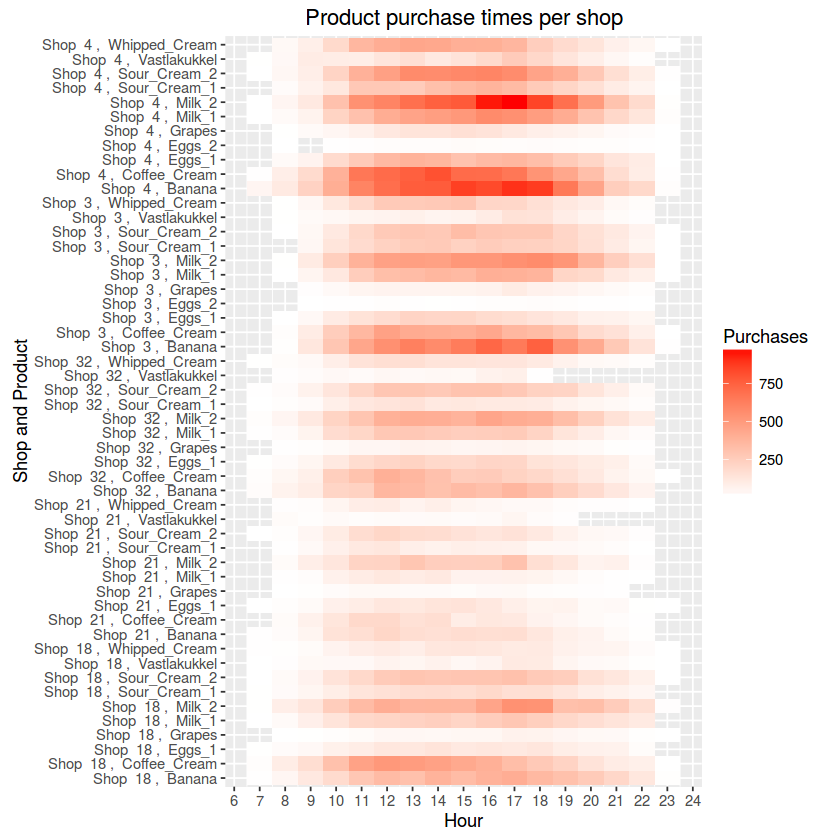

In [18]:
library(ggplot2)
hmData <- aggregate(cbind(count = hour) ~ product + shop_id + hour, dat, NROW)
ggplot(hmData, aes(x = hour, y = paste('Shop ', shop_id, ', ', product))) +
ggtitle('Product purchase times per shop') + geom_tile(aes(fill = count)) +
scale_fill_gradient(name = 'Purchases', low = 'white', high = 'red') +
scale_x_continuous(name = 'Hour', breaks=seq(0,24,1)) +
scale_y_discrete(name = 'Shop and Product')

TASK 6

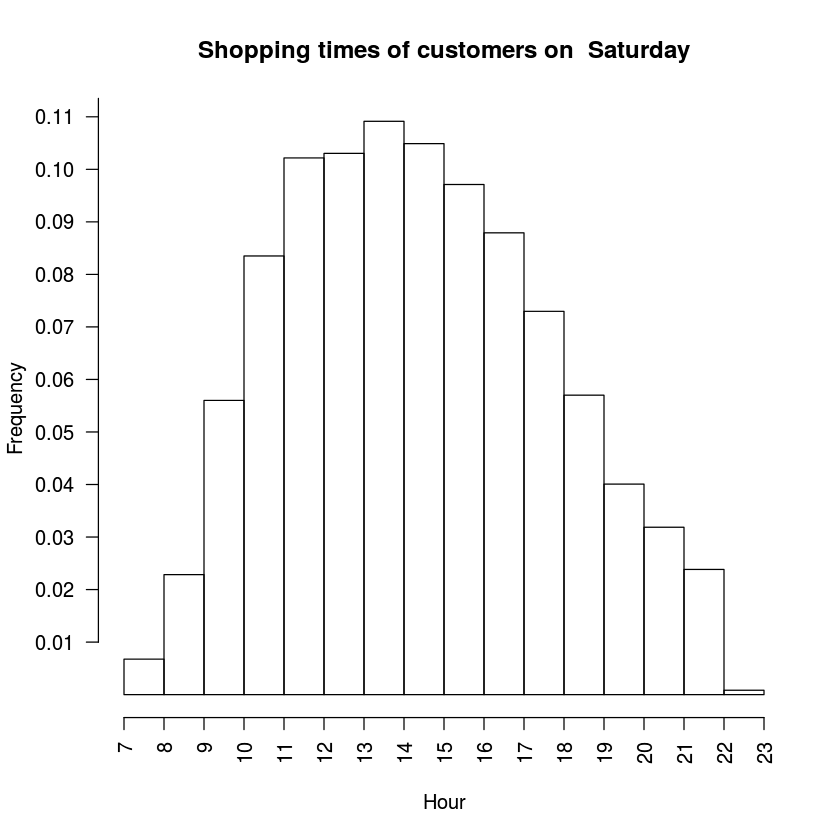

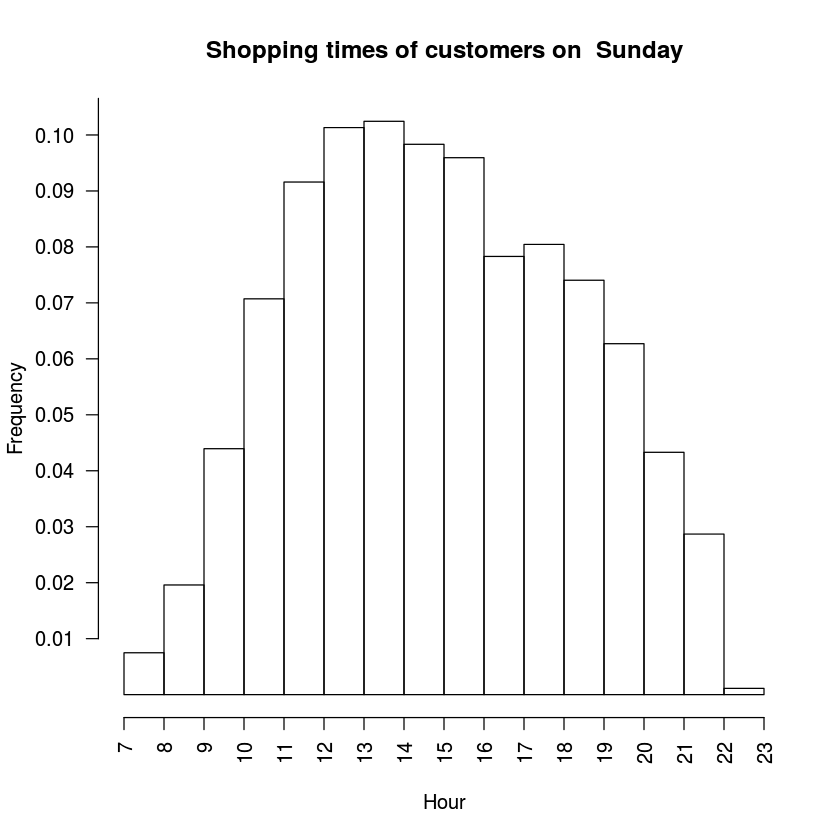

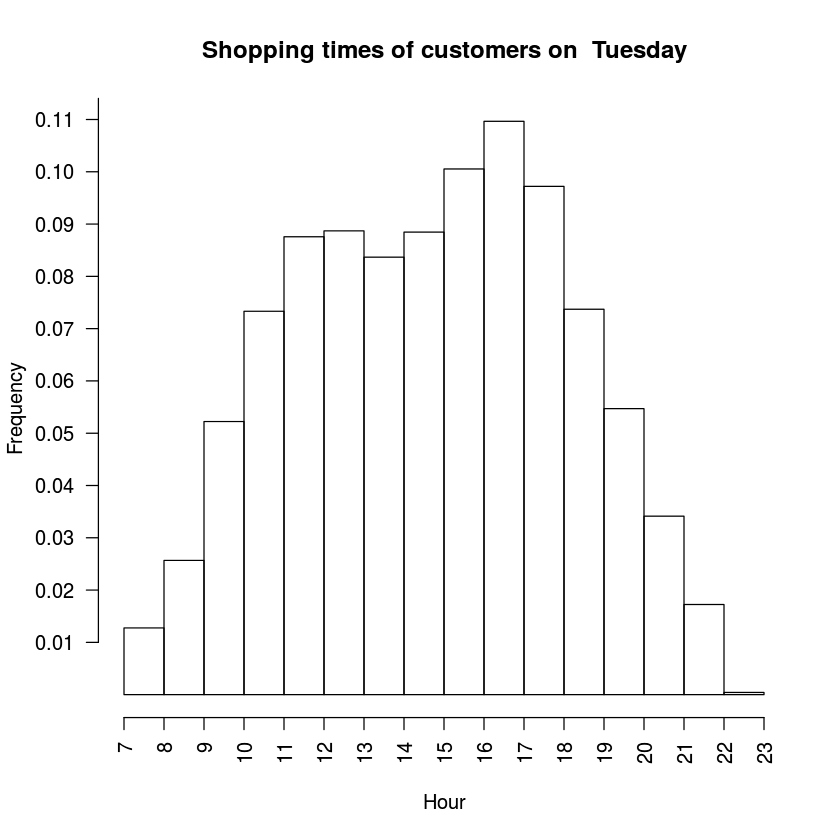

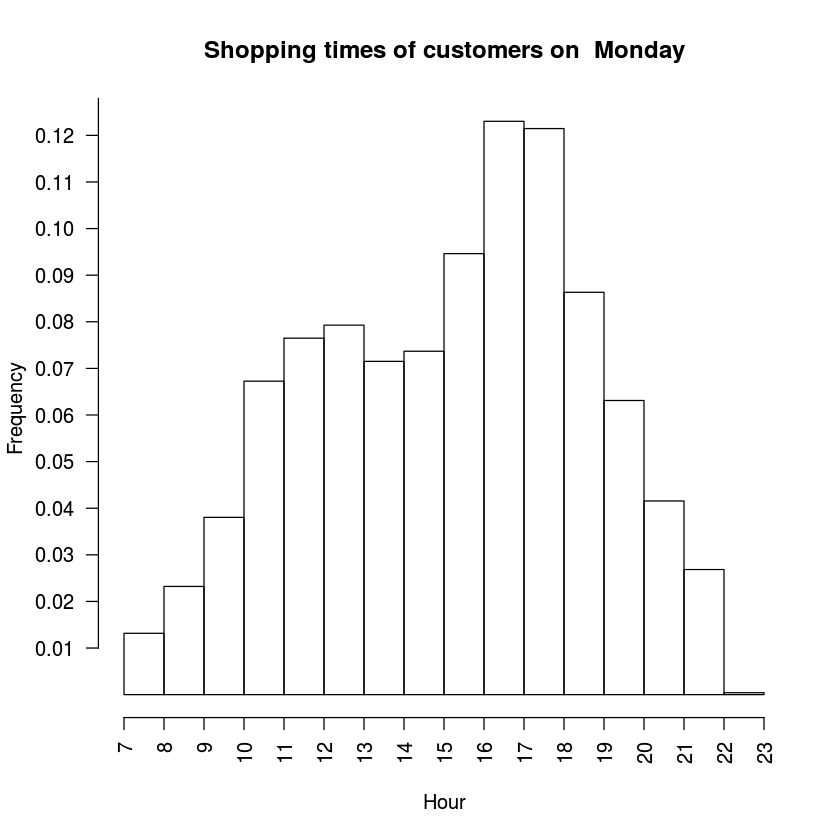

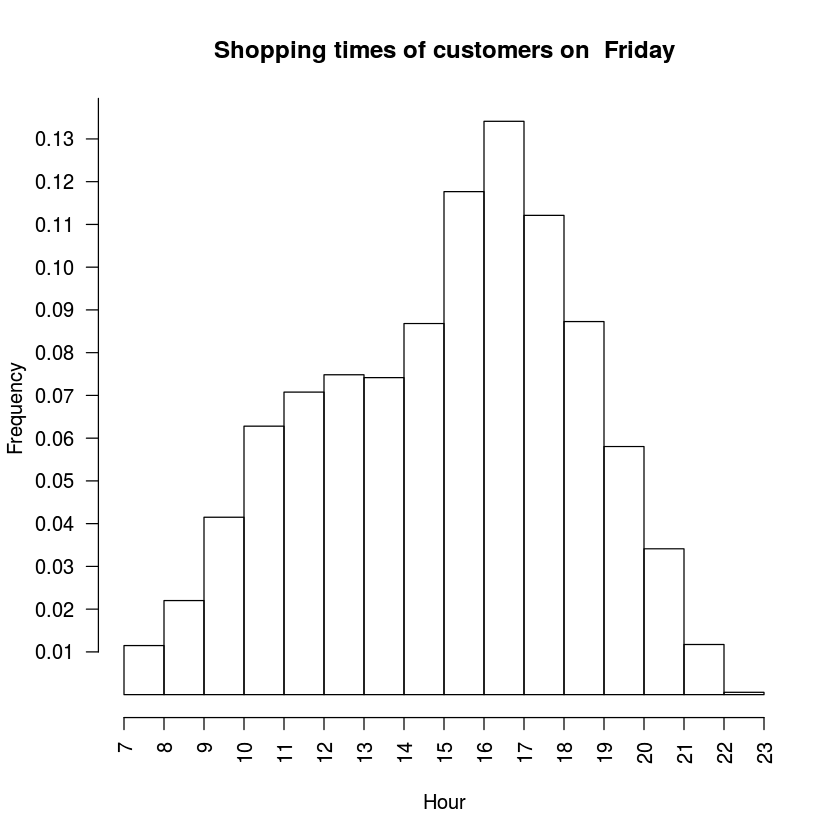

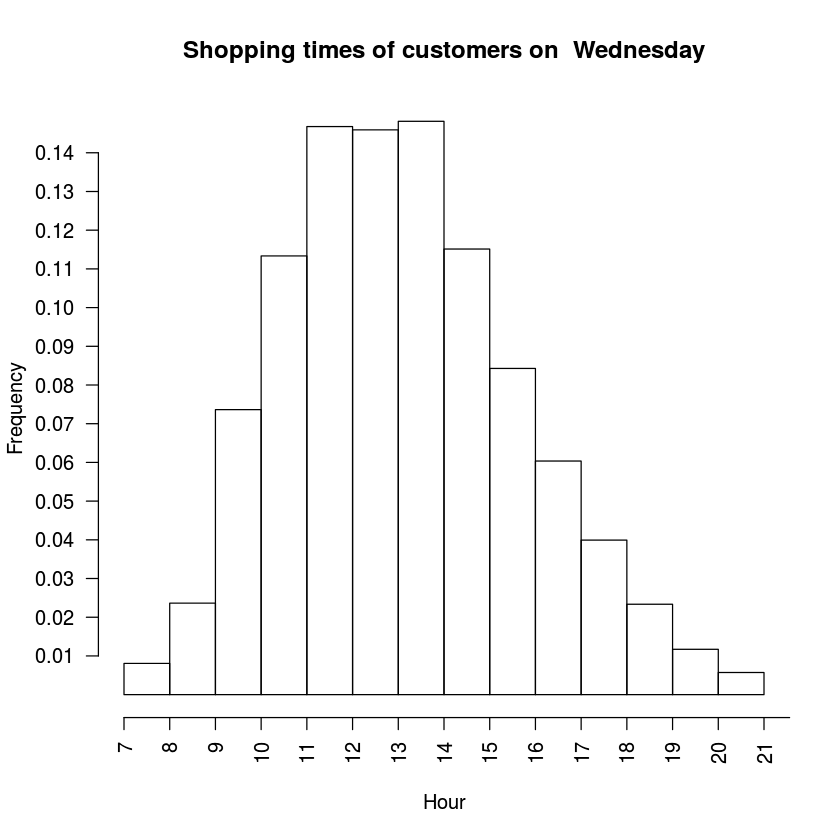

In [19]:
for (weekday in unique(dat$weekday)) {
hist(dat[dat$weekday == weekday, 'hour'],
xlab = 'Hour', ylab = 'Frequency', probability = TRUE,
main = paste('Shopping times of customers on ', weekday), xaxt = 'n', yaxt = 'n')
axis(1, at = seq(7, 23, by = 1), las = 2)
axis(2, at = seq(0.01, 0.14, by = 0.01), las = 2)
}

NORMALIZATION

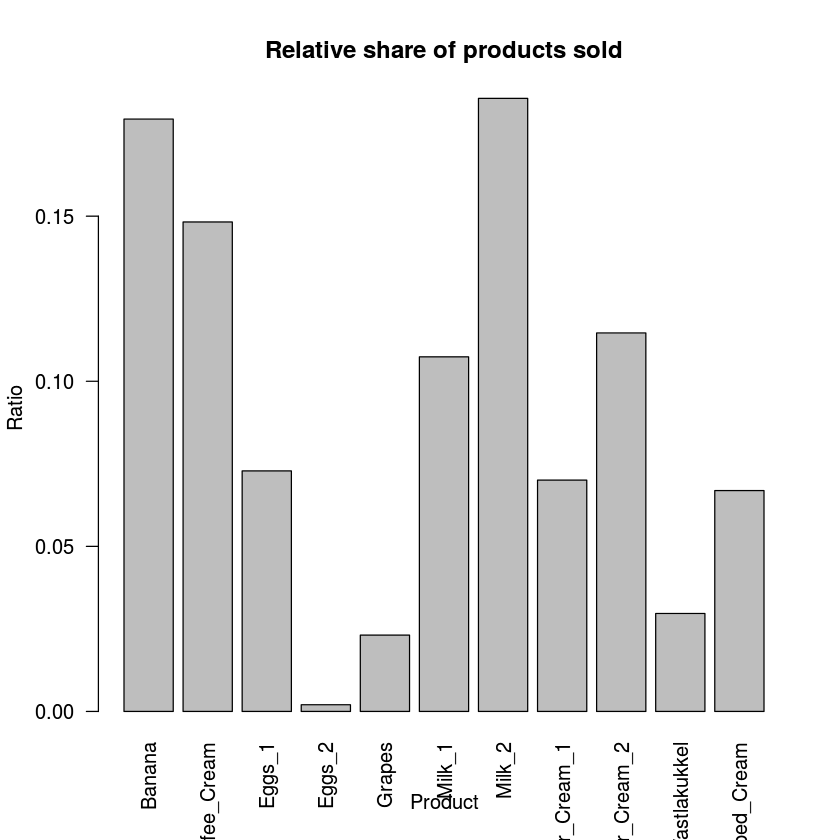

In [20]:
barplot(table(dat$product) / nrow(dat),
xlab = 'Product', ylab = 'Ratio', las = 2, main = 'Relative share of products sold')

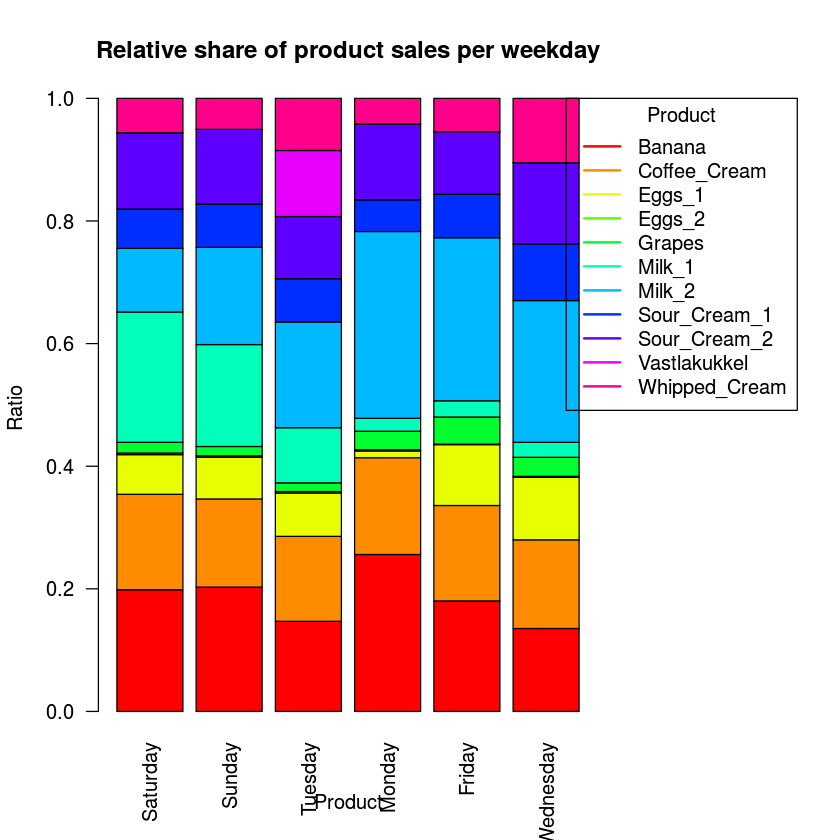

In [21]:
weekdays <- unique(dat$weekday)
colors <- rainbow(length(unique(dat$product)))
bpData <- table(matrix())
for (weekday in weekdays) {
dayData <- dat[dat$weekday == weekday, 'product']
bpData <- cbind(bpData, table(dayData) / length(dayData))
}
colnames(bpData) <- weekdays
par(mar = c(5.1, 4.1, 4.1, 10.1), xpd = TRUE)
barplot(bpData, xlab = 'Product', ylab = 'Ratio', las = 2, col = colors,
main = paste('Relative share of product sales per weekday'), pch = 1)
legend('topright', inset = c(-0.4, 0), title = 'Product',
legend = rownames(bpData), lwd = 2, col = colors)